In [1]:
import numpy as np
import matplotlib.pyplot as plt

from utils.data_process import get_CIFAR10_data
from models.neural_net import NeuralNetwork

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2


# Loading CIFAR-10
Now that you have implemented a neural network that passes gradient checks and works on toy data, you will test your network on the CIFAR-10 dataset.

In [2]:
TRAIN_IMAGES = 49000
VAL_IMAGES = 1000
TEST_IMAGES = 5000

data = get_CIFAR10_data(TRAIN_IMAGES, VAL_IMAGES, TEST_IMAGES)
X_train, y_train = data['X_train'], data['y_train']
X_val, y_val = data['X_val'], data['y_val']
X_test, y_test = data['X_test'], data['y_test']

# Train a network
To train our network we will use SGD. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

You can try different numbers of layers and also the different activation functions that you implemented on the CIFAR-10 dataset below.

In [20]:
input_size = 32 * 32 * 3
num_layers = 2
num_classes = 10
hidden_size = 200
hidden_sizes = [hidden_size]*(num_layers-1)

# Train 1 network model
net = NeuralNetwork(input_size, hidden_sizes, num_classes, num_layers, nonlinearity='relu')

stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-3, learning_rate_decay=0.95,
            reg=0.1, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)


iteration 0 / 1000: loss 3.576550
iteration 100 / 1000: loss 3.066521
iteration 200 / 1000: loss 3.037682
iteration 300 / 1000: loss 2.900305
iteration 400 / 1000: loss 2.829076
iteration 500 / 1000: loss 2.788740
iteration 600 / 1000: loss 2.752284
iteration 700 / 1000: loss 2.701361
iteration 800 / 1000: loss 2.586692
iteration 900 / 1000: loss 2.620781
Validation accuracy:  0.374


# Graph loss and train/val accuracies

Examining the loss graph along with the train and val accuracy graphs should help you gain some intuition for the hyperparameters you should try in the hyperparameter tuning below. It should also help with debugging any issues you might have with your network.

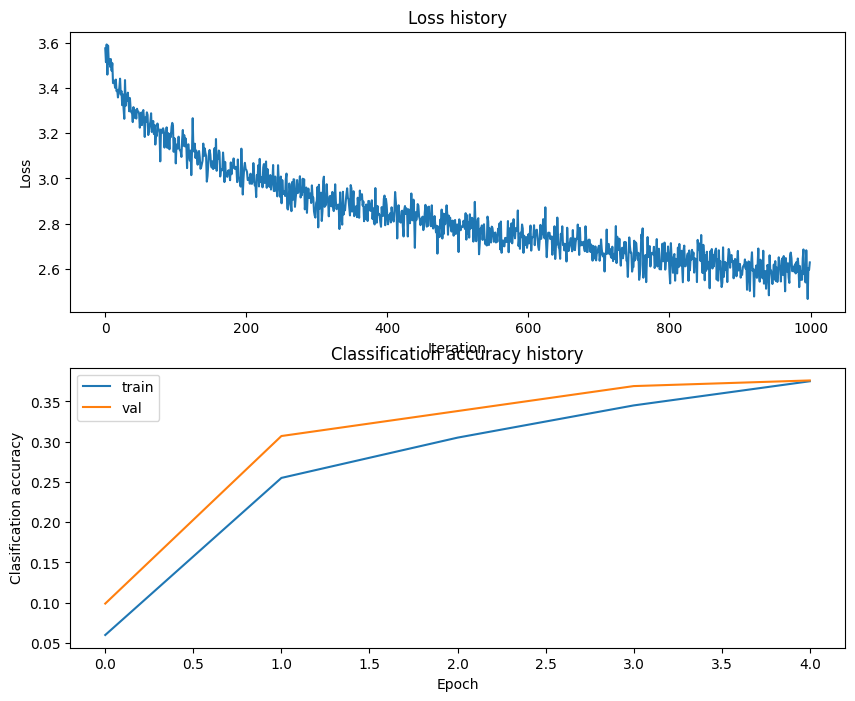

In [21]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend()
plt.show()

# Hyperparameter tuning

Once you have successfully trained a network you can tune your hyparameters to increase your accuracy.

Based on the graphs of the loss function above you should be able to develop some intuition about what hyperparameter adjustments may be necessary. A very noisy loss implies that the learning rate might be too high, while a linearly decreasing loss would suggest that the learning rate may be too low. A large gap between training and validation accuracy would suggest overfitting due to large model without much regularization. No gap between training and validation accuracy would indicate low model capacity. 


You will compare networks of two and three layers using the different activation functions you implemented. 

The different hyperparameters you can experiment with are:
- **Batch size**: We recommend you leave this at 200 initially which is the batch size we used. 
- **Number of iterations**: You can gain an intuition for how many iterations to run by checking when the validation accuracy plateaus in your train/val accuracy graph.
- **Initialization** Weight initialization is very important for neural networks. We used the initialization `W = np.random.randn(n) / sqrt(n)` where `n` is the input dimension for layer corresponding to `W`. We recommend you stick with the given initializations, but you may explore modifying these. Typical initialization practices: http://cs231n.github.io/neural-networks-2/#init
- **Learning rate**: Generally from around 1e-4 to 1e-1 is a good range to explore according to our implementation.
- **Learning rate decay**: We recommend a 0.95 decay to start.
- **Hidden layer size**: You should explore up to around 120 units per layer. For three-layer network, we fixed the two hidden layers to be the same size when obtaining the target numbers. However, you may experiment with having different size hidden layers.
- **Regularization coefficient**: We recommend trying values in the range 0 to 0.1. 



Hints:
- After getting a sense of the parameters by trying a few values yourself, you will likely want to write a few for loops to traverse over a set of hyperparameters.
- If you find that your train loss is decreasing, but your train and val accuracy start to decrease rather than increase, your model likely started minimizing the regularization term. To prevent this you will need to decrease the regularization coefficient. 


## Generate random hyperparameters to expedite tuning

In [22]:
def generate_random_hyperparams(learnrate_values, reg_values, hiddenlayer_values, rng):
    learnrate = learnrate_values[rng.integers(0, len(learnrate_values))]
    reg = reg_values[rng.integers(0, len(reg_values))]
    hiddenlayer = hiddenlayer_values[rng.integers(0, len(hiddenlayer_values))]
    return learnrate, reg, hiddenlayer

# Set a seed to easily reproduce results
rng = np.random.default_rng(seed=0)

## Two-layer Relu Activation Network 

In [76]:
best_2layer_relu = None
#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_2layer_relu.                                                    #
#################################################################################
num_layers = 2

# Store validation accuracy of network models
best_validation = -1

for i in range(10):
    # Get random set of hyperparameters 
    learnrate_value, reg_value, hiddensize_value = \
        generate_random_hyperparams([0.1], [0.002], [120], rng)
    hidden_size = hiddensize_value
    hidden_sizes = [hidden_size]*(num_layers-1)

    # Initialize the network and train it
    net = NeuralNetwork(input_size, hidden_sizes, num_classes, num_layers, nonlinearity='relu')
    stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=3000, batch_size=200,
            learning_rate=learnrate_value, learning_rate_decay=0.95,
            reg=reg_value, verbose=False)
    
    train_accuracy = (net.predict(X_train) == y_train).mean()
    validation_accuracy = (net.predict(X_val) == y_val).mean()

    # Store stats of network model with highest validation accuracy
    if validation_accuracy > best_validation:
        best_validation = validation_accuracy
        best_2layer_relu = net

    print(f"Model: {i+1}, Learn rate: {learnrate_value}, Reg: {reg_value}, Hidden layers: {hiddensize_value}, Training accuracy: {train_accuracy}, Validation accuracy: {validation_accuracy}")

print(f"Best validation accuracy: {best_validation}")

Model: 1, Learn rate: 0.1, Reg: 0.002, Hidden layers: 120, Training accuracy: 0.6323673469387755, Validation accuracy: 0.53
Model: 2, Learn rate: 0.1, Reg: 0.002, Hidden layers: 120, Training accuracy: 0.6278775510204082, Validation accuracy: 0.544
Model: 3, Learn rate: 0.1, Reg: 0.002, Hidden layers: 120, Training accuracy: 0.6263673469387755, Validation accuracy: 0.536
Model: 4, Learn rate: 0.1, Reg: 0.002, Hidden layers: 120, Training accuracy: 0.6278163265306123, Validation accuracy: 0.522
Model: 5, Learn rate: 0.1, Reg: 0.002, Hidden layers: 120, Training accuracy: 0.6287551020408163, Validation accuracy: 0.518
Model: 6, Learn rate: 0.1, Reg: 0.002, Hidden layers: 120, Training accuracy: 0.635061224489796, Validation accuracy: 0.538
Model: 7, Learn rate: 0.1, Reg: 0.002, Hidden layers: 120, Training accuracy: 0.635, Validation accuracy: 0.551
Model: 8, Learn rate: 0.1, Reg: 0.002, Hidden layers: 120, Training accuracy: 0.6309183673469387, Validation accuracy: 0.54
Model: 9, Learn 

## Two-layer Sigmoid Activation Network 

In [65]:
best_2layer_sigmoid = None
#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_2layer_sigmoid.                                                 #
#################################################################################
num_layers = 2

# Store validation accuracy of network models
best_validation = -1

for i in range(10):
    # Get random set of hyperparameters 
    learnrate_value, reg_value, hiddensize_value = \
        generate_random_hyperparams([0.1], [0.002], [120], rng)
    hidden_size = hiddensize_value
    hidden_sizes = [hidden_size]*(num_layers-1)

    # Initialize the network and train it
    net = NeuralNetwork(input_size, hidden_sizes, num_classes, num_layers, nonlinearity='sigmoid')
    stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=4000, batch_size=200,
            learning_rate=learnrate_value, learning_rate_decay=0.95,
            reg=reg_value, verbose=False)
    
    train_accuracy = (net.predict(X_train) == y_train).mean()
    validation_accuracy = (net.predict(X_val) == y_val).mean()

    # Store stats of network model with highest validation accuracy
    if validation_accuracy > best_validation:
        best_validation = validation_accuracy
        best_2layer_sigmoid = net

    print(f"Model: {i+1}, Learn rate: {learnrate_value}, Reg: {reg_value}, Hidden layers: {hiddensize_value}, Training accuracy: {train_accuracy}, Validation accuracy: {validation_accuracy}")

print(f"Best validation accuracy: {best_validation}")

Model: 1, Learn rate: 0.1, Reg: 0.002, Hidden layers: 120, Training accuracy: 0.4780408163265306, Validation accuracy: 0.447
Model: 2, Learn rate: 0.1, Reg: 0.002, Hidden layers: 120, Training accuracy: 0.47861224489795917, Validation accuracy: 0.461
Model: 3, Learn rate: 0.1, Reg: 0.002, Hidden layers: 120, Training accuracy: 0.479734693877551, Validation accuracy: 0.449
Model: 4, Learn rate: 0.1, Reg: 0.002, Hidden layers: 120, Training accuracy: 0.48012244897959183, Validation accuracy: 0.455
Model: 5, Learn rate: 0.1, Reg: 0.002, Hidden layers: 120, Training accuracy: 0.47846938775510206, Validation accuracy: 0.452
Model: 6, Learn rate: 0.1, Reg: 0.002, Hidden layers: 120, Training accuracy: 0.4810408163265306, Validation accuracy: 0.445
Model: 7, Learn rate: 0.1, Reg: 0.002, Hidden layers: 120, Training accuracy: 0.48346938775510206, Validation accuracy: 0.468
Model: 8, Learn rate: 0.1, Reg: 0.002, Hidden layers: 120, Training accuracy: 0.48277551020408166, Validation accuracy: 0.

## Three-layer Relu Activation Network 

In [71]:
best_3layer_relu = None
#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_3layer_relu.                                                    #
#################################################################################
num_layers = 3

# Store validation accuracy of network models
best_validation = -1

for i in range(10):
    # Get random set of hyperparameters 
    learnrate_value, reg_value, hiddensize_value = \
        generate_random_hyperparams([0.1], [0.002], [120], rng)
    hidden_size = hiddensize_value
    hidden_sizes = [hidden_size]*(num_layers-1)

    # Initialize the network and train it
    net = NeuralNetwork(input_size, hidden_sizes, num_classes, num_layers, nonlinearity='relu')
    stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=3000, batch_size=200,
            learning_rate=learnrate_value, learning_rate_decay=0.95,
            reg=reg_value, verbose=False)
    
    train_accuracy = (net.predict(X_train) == y_train).mean()
    validation_accuracy = (net.predict(X_val) == y_val).mean()

    # Store stats of network model with highest validation accuracy
    if validation_accuracy > best_validation:
        best_validation = validation_accuracy
        best_3layer_relu = net

    print(f"Model: {i+1}, Learn rate: {learnrate_value}, Reg: {reg_value}, Hidden layers: {hiddensize_value}, Training accuracy: {train_accuracy}, Validation accuracy: {validation_accuracy}")

print(f"Best validation accuracy: {best_validation}")

Model: 1, Learn rate: 0.1, Reg: 0.002, Hidden layers: 120, Training accuracy: 0.6399591836734694, Validation accuracy: 0.538
Model: 2, Learn rate: 0.1, Reg: 0.002, Hidden layers: 120, Training accuracy: 0.6423877551020408, Validation accuracy: 0.551
Model: 3, Learn rate: 0.1, Reg: 0.002, Hidden layers: 120, Training accuracy: 0.6361428571428571, Validation accuracy: 0.554
Model: 4, Learn rate: 0.1, Reg: 0.002, Hidden layers: 120, Training accuracy: 0.6403061224489796, Validation accuracy: 0.526
Model: 5, Learn rate: 0.1, Reg: 0.002, Hidden layers: 120, Training accuracy: 0.6511836734693878, Validation accuracy: 0.548
Model: 6, Learn rate: 0.1, Reg: 0.002, Hidden layers: 120, Training accuracy: 0.6326326530612245, Validation accuracy: 0.543
Model: 7, Learn rate: 0.1, Reg: 0.002, Hidden layers: 120, Training accuracy: 0.6350816326530613, Validation accuracy: 0.54
Model: 8, Learn rate: 0.1, Reg: 0.002, Hidden layers: 120, Training accuracy: 0.6389591836734694, Validation accuracy: 0.546
M

## Three-layer Sigmoid Activation Network 

In [83]:
best_3layer_sigmoid = None
#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_3layer_sigmoid.                                                 #
#################################################################################
num_layers = 3

# Store validation accuracy of network models
best_validation = -1

for i in range(10):
    # Get random set of hyperparameters 
    learnrate_value, reg_value, hiddensize_value = \
        generate_random_hyperparams([0.1], [0.002], [125], rng)
    hidden_size = hiddensize_value
    hidden_sizes = [hidden_size]*(num_layers-1)

    # Initialize the network and train it
    net = NeuralNetwork(input_size, hidden_sizes, num_classes, num_layers, nonlinearity='sigmoid')
    stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=4000, batch_size=200,
            learning_rate=learnrate_value, learning_rate_decay=0.95,
            reg=reg_value, verbose=False)
    
    train_accuracy = (net.predict(X_train) == y_train).mean()
    validation_accuracy = (net.predict(X_val) == y_val).mean()

    # Store stats of network model with highest validation accuracy
    if validation_accuracy > best_validation:
        best_validation = validation_accuracy
        best_3layer_sigmoid = net

    print(f"Model: {i+1}, Learn rate: {learnrate_value}, Reg: {reg_value}, Hidden layers: {hiddensize_value}, Training accuracy: {train_accuracy}, Validation accuracy: {validation_accuracy}")

print(f"Best validation accuracy: {best_validation}")

Model: 1, Learn rate: 0.1, Reg: 0.002, Hidden layers: 125, Training accuracy: 0.41706122448979593, Validation accuracy: 0.423
Model: 2, Learn rate: 0.1, Reg: 0.002, Hidden layers: 125, Training accuracy: 0.41777551020408166, Validation accuracy: 0.433
Model: 3, Learn rate: 0.1, Reg: 0.002, Hidden layers: 125, Training accuracy: 0.4168775510204082, Validation accuracy: 0.417
Model: 4, Learn rate: 0.1, Reg: 0.002, Hidden layers: 125, Training accuracy: 0.4116326530612245, Validation accuracy: 0.409
Model: 5, Learn rate: 0.1, Reg: 0.002, Hidden layers: 125, Training accuracy: 0.41785714285714287, Validation accuracy: 0.414
Model: 6, Learn rate: 0.1, Reg: 0.002, Hidden layers: 125, Training accuracy: 0.4161836734693878, Validation accuracy: 0.425
Model: 7, Learn rate: 0.1, Reg: 0.002, Hidden layers: 125, Training accuracy: 0.4159591836734694, Validation accuracy: 0.421
Model: 8, Learn rate: 0.1, Reg: 0.002, Hidden layers: 125, Training accuracy: 0.41051020408163263, Validation accuracy: 0.

# Run on the test set
When you are done experimenting, you should evaluate your final trained networks on the test set.

In [84]:
print('Two-layer relu')
test_acc = (best_2layer_relu.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Two-layer relu
Test accuracy:  0.5266


In [85]:
print('Two-layer sigmoid')
test_acc = (best_2layer_sigmoid.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Two-layer sigmoid
Test accuracy:  0.4622


In [86]:
print('Three-layer relu')
test_acc = (best_3layer_relu.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Three-layer relu
Test accuracy:  0.5342


In [87]:
print('Three-layer sigmoid')
test_acc = (best_3layer_sigmoid.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Three-layer sigmoid
Test accuracy:  0.4148
